In [57]:
import numpy as np
import random
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

In [58]:
D = np.random.randn(1000,500)
hidden_layer_sizes = [500]*10
nonlinearities = ['tanh']*len(hidden_layer_sizes)

act = {'relu':lambda x:np.maximum(0,x), 'tanh':lambda x:np.tanh(x)}

#### Showing saturation of activations by improper weight initialization

1. Multiplying weights by small constant 0.01 saturates activations -> 0.0
2. Keeping weights as initialized (W*1.0) blows activations up -> 1.0 

In [50]:
Hs_collapsed = {}
Hs_blown = {}
for i in range(len(hidden_layer_sizes) * 2):
    if i < 10:
        ###: H updates on collapsed weight values
        if i == 0:
            X = D
        else:
            X = Hs_collapsed[i-1]
        n_in = X.shape[1] 
        n_out = hidden_layer_sizes[i] 
        W = np.random.randn(n_in, n_out) * 0.01
        H = np.dot(X, W)
        H = act[nonlinearities[i]](H)
        Hs_collapsed[i] = H
    else:
        ###: H updates on blown weight values
        ix = np.abs(10-(20-i-1))-1
        if ix == 0:
            X = D
        else:
            X = Hs_blown[ix-1]
        n_in = X.shape[1] 
        n_out = hidden_layer_sizes[ix] 
        W = np.random.randn(n_in, n_out) * 1.0
        H = np.dot(X, W)
        H = act[nonlinearities[ix]](H)
        Hs_blown[ix] = H 
        
print("Saturation -> 0 results: \n")
print("Input layer mean {mu} and standard deviation {sd}".format(mu=np.mean(D), sd=np.mean(D)))
layer_means_c = [np.mean(H) for i, H in Hs_collapsed.items()]
layer_stds_c = [np.std(H) for i, H in Hs_collapsed.items()]

for i, H in Hs_collapsed.items():
    print("Hidden layer {layer} had mean {mu} and standard deviation {sd}".format(layer=i+1, mu=layer_means_c[i], sd=layer_stds_c[i]))

print("\nSaturation -> 1 results: \n")
print("Input layer mean {mu} and standard deviation {sd}".format(mu=np.mean(D), sd=np.mean(D)))
layer_means_b = [np.mean(H) for i, H in Hs_blown.items()]
layer_stds_b = [np.std(H) for i, H in Hs_blown.items()]

for i, H in Hs_blown.items():
    print("Hidden layer {layer} had mean {mu} and standard deviation {sd}".format(layer=i+1, mu=layer_means_b[i], sd=layer_stds_b[i]))

Saturation -> 0 results: 

Input layer mean 0.0011851875627553298 and standard deviation 0.0011851875627553298
Hidden layer 1 had mean -0.00015144849047665104 and standard deviation 0.21369627539500533
Hidden layer 2 had mean -6.166079811299169e-05 and standard deviation 0.04761745542655966
Hidden layer 3 had mean -2.20373944639182e-05 and standard deviation 0.010657448316375651
Hidden layer 4 had mean 7.2622094328921585e-09 and standard deviation 0.0023835684855701643
Hidden layer 5 had mean -1.2328426044073644e-06 and standard deviation 0.0005347555387391606
Hidden layer 6 had mean 1.0388018489212404e-07 and standard deviation 0.0001198488111054116
Hidden layer 7 had mean -1.0841612246906685e-08 and standard deviation 2.6907406747189266e-05
Hidden layer 8 had mean 1.5317296680051103e-09 and standard deviation 6.006150595321558e-06
Hidden layer 9 had mean 1.7745009725613859e-10 and standard deviation 1.333743887233919e-06
Hidden layer 10 had mean 3.6356634745182343e-10 and standard de

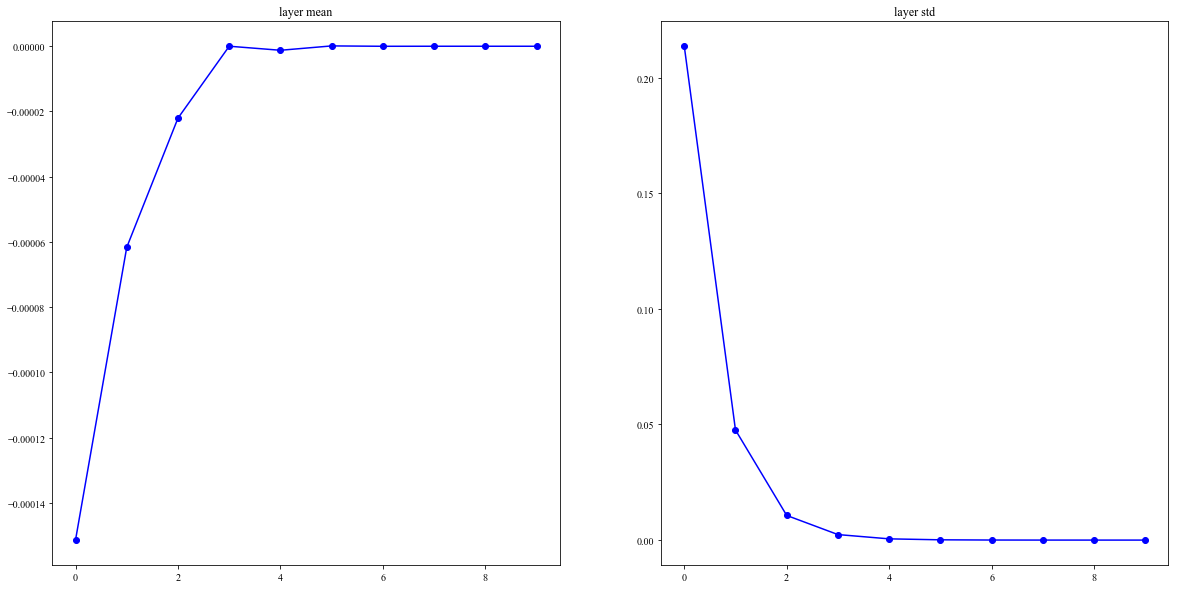

In [51]:
plt.figure(figsize=(20,10))
keys = np.array([key for key in Hs_collapsed.keys()])

plt.subplot(121)
l_means = np.array(layer_means_c).T
plt.plot(keys, l_means, 'ob-')
plt.title('layer mean')

plt.subplot(122)
l_stds = np.array(layer_stds_c).T
plt.plot(keys, l_stds, 'ob-')
plt.title('layer std')

plt.show()

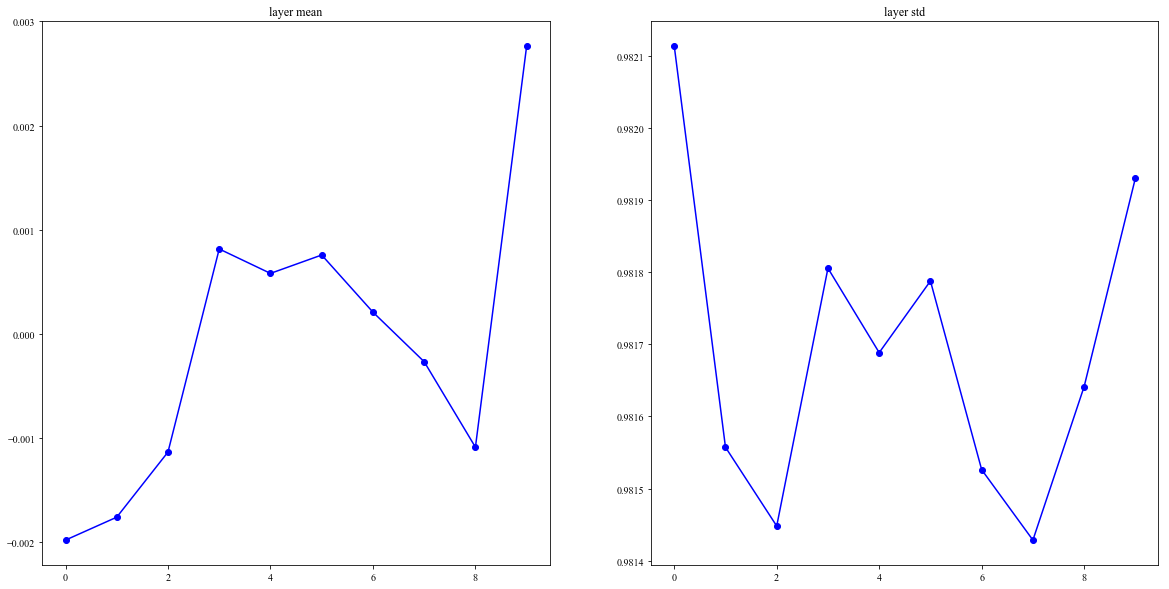

In [52]:
plt.figure(figsize=(20,10))
keys = np.array([key for key in Hs_blown.keys()])

plt.subplot(121)
l_means = np.array(layer_means_b).T
plt.plot(keys, l_means, 'ob-')
plt.title('layer mean')

plt.subplot(122)
l_stds = np.array(layer_stds_b).T
plt.plot(keys, l_stds, 'ob-')
plt.title('layer std')

plt.show()

#### If we assume linearity in activation functions (e.g. we fall in the range of our tanh function), we can modify weights with the Xavier initialization

In [59]:
Hs_Xavier = {}
for i in range(len(hidden_layer_sizes)):
    if i == 0:
        X = D
    else:
        X = Hs_Xavier[i-1]
    n_in = X.shape[1] 
    n_out = hidden_layer_sizes[i] 
    W = np.random.randn(n_in, n_out) / np.sqrt(n_in)
    H = np.dot(X, W)
    H = act[nonlinearities[i]](H)
    Hs_Xavier[i] = H
    
print("Xavier Initialization results: \n")
print("Input layer mean {mu} and standard deviation {sd}".format(mu=np.mean(D), sd=np.mean(D)))
layer_means_X = [np.mean(H) for i, H in Hs_Xavier.items()]
layer_stds_X = [np.std(H) for i, H in Hs_Xavier.items()]

for i, H in Hs_Xavier.items():
    print("Hidden layer {layer} had mean {mu} and standard deviation {sd}".format(layer=i+1, mu=layer_means_X[i], sd=layer_stds_X[i]))

Xavier Initialization results: 

Input layer mean -0.002009344806863033 and standard deviation -0.002009344806863033
Hidden layer 1 had mean -0.0005587523364768892 and standard deviation 0.6261858488450713
Hidden layer 2 had mean -0.00016006786521321735 and standard deviation 0.4855304805071045
Hidden layer 3 had mean 0.000249596564067049 and standard deviation 0.4076029818753435
Hidden layer 4 had mean -0.0011216519751956297 and standard deviation 0.3571666498416037
Hidden layer 5 had mean -0.0004519233138574804 and standard deviation 0.32174508226214427
Hidden layer 6 had mean -0.0007285689639000204 and standard deviation 0.29450263508060426
Hidden layer 7 had mean 0.0002497798550637487 and standard deviation 0.2742060589119798
Hidden layer 8 had mean 1.246204226633467e-05 and standard deviation 0.25726289338200903
Hidden layer 9 had mean 0.00015054009688872502 and standard deviation 0.24226117630352226
Hidden layer 10 had mean -9.11527007482332e-07 and standard deviation 0.230989271

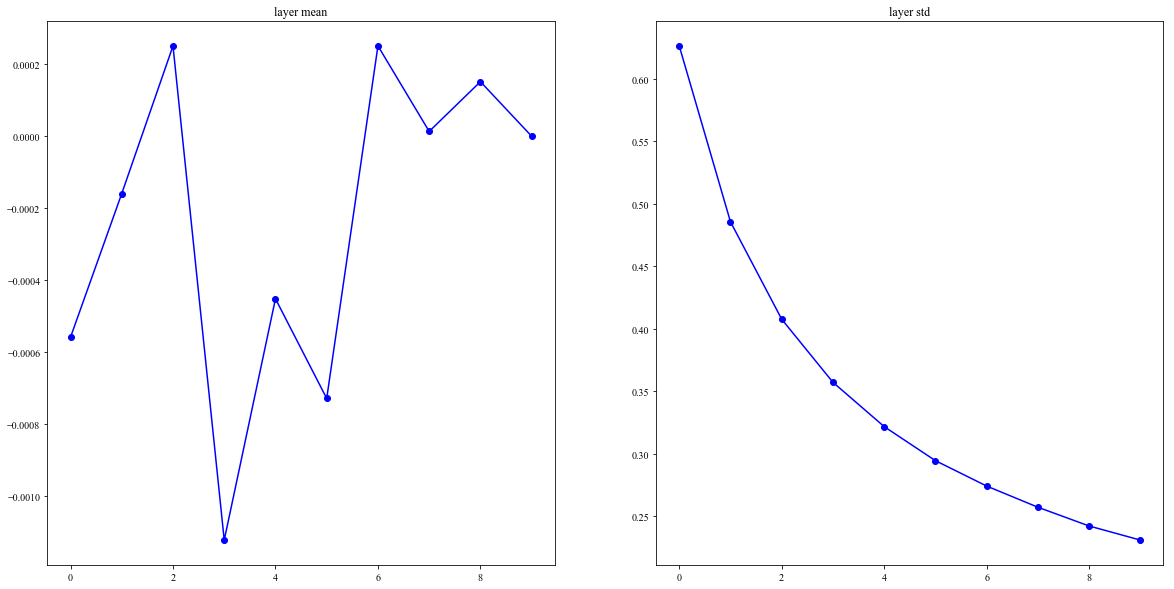

In [60]:
plt.figure(figsize=(20,10))
keys = np.array([key for key in Hs_Xavier.keys()])
plt.subplot(121)
l_means = np.array(layer_means_X).T
plt.plot(keys, l_means, 'ob-')
plt.title('layer mean')

plt.subplot(122)
l_stds = np.array(layer_stds_X).T
plt.plot(keys, l_stds, 'ob-')
plt.title('layer std')

plt.show()

#### Using a non-linear activation like ReLU we assume ~ 1/2 the weights saturate to 0 from it's max(0,h) behavior, thus causing our distribution to collapse and activation variance to saturate -> 0.

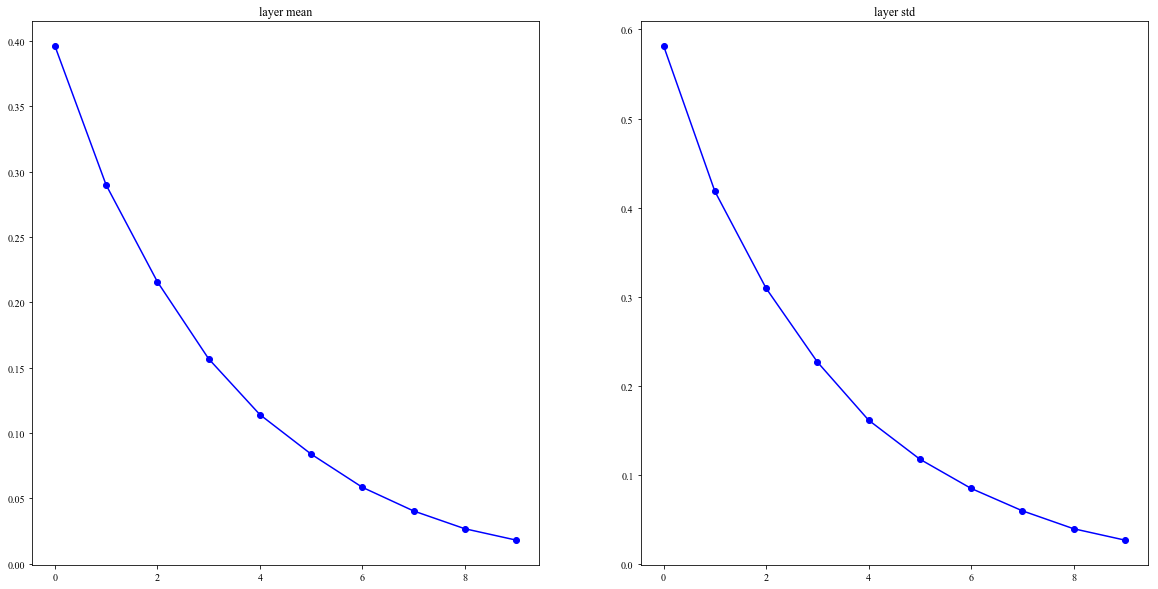

In [61]:
nonlinearities = ['relu']*len(hidden_layer_sizes)
Hs_Xavier = {}
for i in range(len(hidden_layer_sizes)):
    if i == 0:
        X = D
    else:
        X = Hs_Xavier[i-1]
    n_in = X.shape[1] 
    n_out = hidden_layer_sizes[i] 
    W = np.random.randn(n_in, n_out) / np.sqrt(n_in)
    H = np.dot(X, W)
    H = act[nonlinearities[i]](H)
    Hs_Xavier[i] = H

layer_means_X = [np.mean(H) for i, H in Hs_Xavier.items()]
layer_stds_X = [np.std(H) for i, H in Hs_Xavier.items()]

plt.figure(figsize=(20,10))
keys = np.array([key for key in Hs_Xavier.keys()])
plt.subplot(121)
l_means = np.array(layer_means_X).T
plt.plot(keys, l_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
l_stds = np.array(layer_stds_X).T
plt.plot(keys, l_stds, 'ob-')
plt.title('layer std')
plt.show()

#### We can adjust for this by dividing weight initialization by 2 (since 1/2 of neurons saturate to 0) 

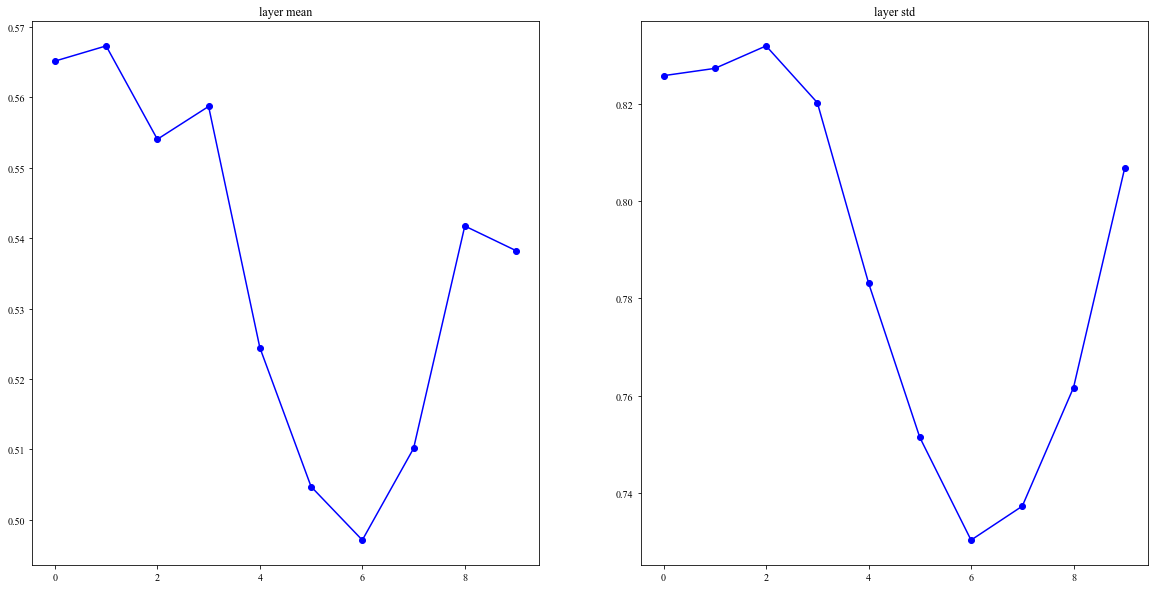

In [62]:
nonlinearities = ['relu']*len(hidden_layer_sizes)
Hs_Xavier = {}
for i in range(len(hidden_layer_sizes)):
    if i == 0:
        X = D
    else:
        X = Hs_Xavier[i-1]
    n_in = X.shape[1] 
    n_out = hidden_layer_sizes[i] 
    W = np.random.randn(n_in, n_out) / np.sqrt(n_in/2)
    H = np.dot(X, W)
    H = act[nonlinearities[i]](H)
    Hs_Xavier[i] = H

layer_means_X = [np.mean(H) for i, H in Hs_Xavier.items()]
layer_stds_X = [np.std(H) for i, H in Hs_Xavier.items()]

plt.figure(figsize=(20,10))
keys = np.array([key for key in Hs_Xavier.keys()])
plt.subplot(121)
l_means = np.array(layer_means_X).T
plt.plot(keys, l_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
l_stds = np.array(layer_stds_X).T
plt.plot(keys, l_stds, 'ob-')
plt.title('layer std')
plt.show()